### Problem Statement
**Food & Beverages Spend Prediction in Club Mahindra Resorts**

Club Mahindra (Club M) makes significant revenue from Food and Beverages (F&B) sales in their resorts. The members of Club M are offered a wide variety of items in either buffet or À la carte form. Following are some benefits that the model to predict the spend by a member in their next visit to a resort will bring:
Predicting the F&B spend of a member in a resort would help in improving the pre-sales during resort booking through web and mobile app
Targeted campaigns to suit the member taste and preference of F&B
Providing members in the resort with a customized experience and offers
Help resort kitchen to plan the inventory and food quantity to be prepared in advance
Given the information related to resort, club member, reservation etc. the task is to predict average spend per room night on food and beverages for the each reservation in the test set.
 

### Data Description
**train.zip**

train.zip contains train.csv and data_dictionary.csv.

train.csv contains the training data with details on a set of reservations with the average spend per room night

Data_Dictionary.xlsx contains a brief description of each variable provided in the training and test set.
 
**test.csv**

test.csv contains details of all reservations for which the participants need to predict the average spend on FnB per room night
 

**sample_submission.csv**

sample_submission.csv contains the submission format for the predictions against the test set. A single csv/zip needs to be submitted as a solution.
 

**Evaluation Metric**

Submissions are evaluated on 100 * Root Mean Squared Error (RMSE) on the variable amount_spent_per_room_night_scaled


In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
pd.set_option('display.max_columns', None)



In [58]:
train=pd.read_csv("train_5CLrC8b/train.csv")
test=pd.read_csv("test.csv")

In [59]:
train.shape

(341424, 24)

In [60]:
test.shape

(146765, 23)

In [61]:
train.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [62]:
train['reservation_id'].nunique()

341424

In [63]:
train['memberid'].nunique()

101327

### Convert the date columns from string to datetime and Extract date features from time columns

In [64]:
def extractDateTimeFeature(date_column,data):
    data[date_column+"_year"]=data[date_column].dt.year
    data[date_column+"_day"]=data[date_column].dt.day
    data[date_column+"_month"]=data[date_column].dt.month
    data[date_column+"_dayofweek"]=data[date_column].dt.dayofweek
    data[date_column+"_isweekend"]=data[date_column+"_dayofweek"].apply(lambda x:1 if x==5 or x==6 else 0)
    return data

In [65]:
date_columns=['booking_date','checkin_date','checkout_date']
for col in date_columns:
    train[col]=pd.to_datetime(train[col],dayfirst=True)
    test[col]=pd.to_datetime(test[col],dayfirst=True)
    train=extractDateTimeFeature(col,train)
    test=extractDateTimeFeature(col,test)

In [66]:
train.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,booking_date_year,booking_date_day,booking_date_month,booking_date_dayofweek,booking_date_isweekend,checkin_date_year,checkin_date_day,checkin_date_month,checkin_date_dayofweek,checkin_date_isweekend,checkout_date_year,checkout_date_day,checkout_date_month,checkout_date_dayofweek,checkout_date_isweekend
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428,2018,5,4,3,0,2018,5,4,3,0,2018,6,4,4,0
1,03930f033646d073462b35d411616323597715ac4fc398...,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563,2015,23,1,4,0,2015,11,4,5,1,2015,16,4,3,0
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602,2015,28,1,2,0,2015,1,2,6,1,2015,5,2,3,0
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943,2015,2,5,5,1,2015,11,6,3,0,2015,16,6,1,0
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346,2015,2,9,2,0,2015,14,12,0,0,2015,19,12,5,1


### Are there any missing values in the data?

In [67]:
pd.isnull(train).sum()

reservation_id                           0
booking_date                             0
checkin_date                             0
checkout_date                            0
channel_code                             0
main_product_code                        0
numberofadults                           0
numberofchildren                         0
persontravellingid                       0
resort_region_code                       0
resort_type_code                         0
room_type_booked_code                    0
roomnights                               0
season_holidayed_code                  114
state_code_residence                  4764
state_code_resort                        0
total_pax                                0
member_age_buckets                       0
booking_type_code                        0
memberid                                 0
cluster_code                             0
reservationstatusid_code                 0
resort_id                                0
amount_spen

There are missing value in season_holidayed_code and state_code_residence in the train. Is this seeen in the test data as well

In [68]:
pd.isnull(test).sum()

reservation_id                 0
booking_date                   0
checkin_date                   0
checkout_date                  0
channel_code                   0
main_product_code              0
numberofadults                 0
numberofchildren               0
persontravellingid             0
resort_region_code             0
resort_type_code               0
room_type_booked_code          0
roomnights                     0
season_holidayed_code         35
state_code_residence        2260
state_code_resort              0
total_pax                      0
member_age_buckets             0
booking_type_code              0
memberid                       0
cluster_code                   0
reservationstatusid_code       0
resort_id                      0
booking_date_year              0
booking_date_day               0
booking_date_month             0
booking_date_dayofweek         0
booking_date_isweekend         0
checkin_date_year              0
checkin_date_day               0
checkin_da

Yup, the same columns are missing in the test data as well

seaon_holidayed_code is the Season in which the member holiday. This we can fill probbaly by looking at the checkin date and the season code for the checkin date for that resort? Before that let us combine train and test dataset

In [69]:
test['amount_spent_per_room_night_scaled']=0

In [70]:
train['dataset']="train"
test['dataset']="test"

In [71]:
missing_resort=train.loc[pd.isnull(train['season_holidayed_code']),'resort_id'].unique()

In [72]:
test.loc[pd.isnull(test['season_holidayed_code']),'resort_id'].unique()

array(['49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8',
       '4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328cb08b5531fcacdabf8a'],
      dtype=object)

In [73]:
missing_resort

array(['49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8',
       '9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e471cfe5e4c5b4ca7f767',
       '4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328cb08b5531fcacdabf8a'],
      dtype=object)

We can see that in test and train data the same set of resorts have missing season_holidayed_code

In [74]:
missing_resort_data=train[(pd.notnull(train['season_holidayed_code'])) & (train['resort_id'].isin(missing_resort))]

### Let us now, use the month,year and resort id to get the missing season_holidayed_code

In [75]:
resort_season=missing_resort_data.groupby(['resort_id','checkin_date','season_holidayed_code'])['reservation_id'].count().reset_index()

In [76]:
resort_season.sort_values(by='checkin_date',ascending=False)

,resort_id,checkin_date,season_holidayed_code,reservation_id
4215,9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e47...,2019-03-01,3.0,2
4214,9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e47...,2019-03-01,2.0,2
1586,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,2019-03-01,4.0,3
4213,9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e47...,2019-02-28,3.0,10
1585,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,2019-02-28,4.0,8
2403,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,2019-02-27,4.0,1
4212,9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e47...,2019-02-27,3.0,11
1584,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,2019-02-27,4.0,6
4211,9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e47...,2019-02-26,3.0,14
1583,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,2019-02-26,4.0,6


In [77]:
def getSeasonHoliday(resort_id,date):
    rows=resort_season.loc[(resort_season['checkin_date']==date) & (resort_season['resort_id']==resort_id)]
    if rows.shape[0]>1:
        max_reservations=np.max(rows['reservation_id'])
        rows=rows[rows['reservation_id']==max_reservations]
        return rows['season_holidayed_code'].tolist()[0]
    if rows.shape[0]==1:
        return rows['season_holidayed_code'].tolist()[0]
    else:
        return 1 # Only 3 such cases found

In [78]:
train['season_holidayed_code_new']=train.apply(lambda row:getSeasonHoliday(row['resort_id'],row['checkin_date']) if pd.isnull(row['season_holidayed_code']) else row['season_holidayed_code'],axis=1)

In [79]:
train.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,booking_date_year,booking_date_day,booking_date_month,booking_date_dayofweek,booking_date_isweekend,checkin_date_year,checkin_date_day,checkin_date_month,checkin_date_dayofweek,checkin_date_isweekend,checkout_date_year,checkout_date_day,checkout_date_month,checkout_date_dayofweek,checkout_date_isweekend,dataset,season_holidayed_code_new
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428,2018,5,4,3,0,2018,5,4,3,0,2018,6,4,4,0,train,2.0
1,03930f033646d073462b35d411616323597715ac4fc398...,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563,2015,23,1,4,0,2015,11,4,5,1,2015,16,4,3,0,train,2.0
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602,2015,28,1,2,0,2015,1,2,6,1,2015,5,2,3,0,train,2.0
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943,2015,2,5,5,1,2015,11,6,3,0,2015,16,6,1,0,train,2.0
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346,2015,2,9,2,0,2015,14,12,0,0,2015,19,12,5,1,train,2.0


In [80]:
test['season_holidayed_code_new']=test.apply(lambda row:getSeasonHoliday(row['resort_id'],row['checkin_date']) if pd.isnull(row['season_holidayed_code']) else row['season_holidayed_code'],axis=1)

In [81]:
train.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,booking_date_year,booking_date_day,booking_date_month,booking_date_dayofweek,booking_date_isweekend,checkin_date_year,checkin_date_day,checkin_date_month,checkin_date_dayofweek,checkin_date_isweekend,checkout_date_year,checkout_date_day,checkout_date_month,checkout_date_dayofweek,checkout_date_isweekend,dataset,season_holidayed_code_new
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428,2018,5,4,3,0,2018,5,4,3,0,2018,6,4,4,0,train,2.0
1,03930f033646d073462b35d411616323597715ac4fc398...,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563,2015,23,1,4,0,2015,11,4,5,1,2015,16,4,3,0,train,2.0
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602,2015,28,1,2,0,2015,1,2,6,1,2015,5,2,3,0,train,2.0
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943,2015,2,5,5,1,2015,11,6,3,0,2015,16,6,1,0,train,2.0
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346,2015,2,9,2,0,2015,14,12,0,0,2015,19,12,5,1,train,2.0


### Are there particular members for which thew state ciode is missing?

In [82]:
missing_state_members_train=train.loc[pd.isnull(train['state_code_residence']),'memberid'].unique().tolist()

In [83]:
missing_state_members_test=test.loc[pd.isnull(test['state_code_residence']),'memberid'].unique().tolist()

In [84]:
data=pd.concat([train,test])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [85]:
state_code_members=data.groupby(['memberid','state_code_residence'])['reservation_id'].count().reset_index()

In [86]:
state_code_members.shape

(142231, 3)

In [87]:
train['memberid'].nunique()

101327

In [88]:
142231 - 144823

-2592

Few members have no info in the train or test dataset. Let us create missing as a seperate code for missing state residency. and this must be considered a category

In [89]:
sorted(train['state_code_residence'].unique().tolist())

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 13.0,
 14.0,
 nan,
 11.0,
 12.0,
 15.0,
 16.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0]

We can see that state_residence code 17 is missing. we can replace the missing state_residence code with this number

In [90]:
train['state_code_residence']=train['state_code_residence'].apply(lambda x:17 if pd.isnull(x) else x)

In [91]:
test['state_code_residence']=test['state_code_residence'].apply(lambda x:17 if pd.isnull(x) else x)

### Feature Enginerring

1. Number of days, before checking in bookin was made?

In [92]:
def diffbetweenDate(date_column1,date_column2):
    delta =  date_column1- date_column2
    return delta.days


In [93]:
train['diff_booking_checkin_days']=train.apply(lambda row:diffbetweenDate(row['checkin_date'],row['booking_date']),axis=1)

In [94]:
test['diff_booking_checkin_days']=test.apply(lambda row:diffbetweenDate(row['checkin_date'],row['booking_date']),
                                               axis=1)

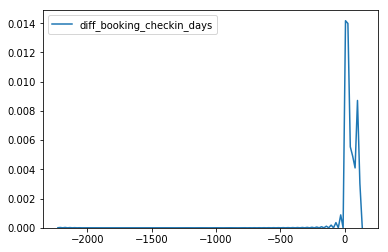

In [95]:
sns.kdeplot(train['diff_booking_checkin_days'])

In [96]:
train[train['diff_booking_checkin_days']<0]

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,booking_date_year,booking_date_day,booking_date_month,booking_date_dayofweek,booking_date_isweekend,checkin_date_year,checkin_date_day,checkin_date_month,checkin_date_dayofweek,checkin_date_isweekend,checkout_date_year,checkout_date_day,checkout_date_month,checkout_date_dayofweek,checkout_date_isweekend,dataset,season_holidayed_code_new,diff_booking_checkin_days
15,821a5e5313029b1bbec6ec738a1b34d6d14c82fca97c47...,2018-04-05,2012-03-08,2012-03-11,3,1,2,0,45,1,1,2,1,3.0,8.0,6,3,H,1,7b68caeb153ac83aeab0b9a679709c558d57a6c9d2bdf6...,F,C,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,3.218876,2018,5,4,3,0,2012,8,3,3,0,2012,11,3,6,1,train,3.0,-2219
34,a80d2fbea1195021307a13a44642855c60f46145dcf29c...,2018-03-31,2012-03-12,2012-03-18,3,2,3,0,45,1,1,3,2,2.0,5.0,1,3,D,2,d4eee99d5c3238cdda52479fb34125e15208d394af34e7...,E,C,48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c...,7.029715,2018,31,3,5,1,2012,12,3,0,0,2012,18,3,6,1,train,2.0,-2210
60,51fe7242f55c79aacb499f957c746445ccb51de3c8d206...,2018-04-05,2012-03-24,2012-03-25,3,2,2,0,45,3,3,3,1,2.0,6.0,3,4,I,1,a24896d1582d8b6c0de997d8b7435962e33580ba80839d...,A,C,f5ca38f748a1d6eaf726b8a42fb575c3c71f1864a81433...,9.142010,2018,5,4,3,0,2012,24,3,5,1,2012,25,3,6,1,train,2.0,-2203
79,548605b68da37dd5c8555a37650910ce9f110e793b4619...,2018-04-05,2012-03-21,2012-03-25,1,3,3,1,45,3,3,2,6,2.0,4.0,5,3,E,1,3bb1aa01c771c2217fe08bae162569a3177da7d09ae6be...,F,A,7902699be42c8a8e46fbbb4501726517e86b22c56a189f...,7.252902,2018,5,4,3,0,2012,21,3,2,0,2012,25,3,6,1,train,2.0,-2206
81,3ac8796577c899cd0177b6f9638515e4feab55d8a72b8b...,2018-04-05,2012-03-23,2012-03-26,1,3,4,0,45,1,1,3,4,2.0,2.0,1,3,E,1,fa856d4dde8f88ed2855a74e2468cedd802ee253434a6c...,E,C,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,7.229536,2018,5,4,3,0,2012,23,3,4,0,2012,26,3,0,0,train,2.0,-2204
113,4d73a3304416c4bff78b47c6b307a07568d7286d946e3e...,2018-04-06,2012-04-09,2012-04-11,1,2,3,1,45,1,2,2,4,3.0,1.0,11,6,D,1,c2eaeada5db1e75552e54382c408fe1c600679060b052c...,F,C,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...,6.516391,2018,6,4,4,0,2012,9,4,0,0,2012,11,4,2,0,train,3.0,-2188
116,8e7c40db97f7088ea2249bb9da85b1cfce31c8b537dcfa...,2018-04-06,2012-04-14,2012-04-15,1,3,4,0,45,1,2,2,2,3.0,1.0,11,4,G,1,48a9cdd22b472fe4aa225acd45acdbe246de12fade4a59...,F,C,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...,8.819591,2018,6,4,4,0,2012,14,4,5,1,2012,15,4,6,1,train,3.0,-2183
129,085264337c2af42038a81b4ec4d9e278d9699e5662d404...,2018-04-06,2012-04-19,2012-04-21,3,1,2,0,45,3,3,4,1,2.0,5.0,5,3,B,1,914d3756e6da218a071578d46a3a3c4fce3b773a1736cb...,F,C,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,8.246436,2018,6,4,4,0,2012,19,4,3,0,2012,21,4,5,1,train,2.0,-2178
130,7294817a3becfb22650a6e4cf0dd7d2a3a1a3969e1e01d...,2018-04-06,2012-04-19,2012-04-21,3,1,2,0,45,3,3,4,1,2.0,5.0,5,3,B,1,914d3756e6da218a071578d46a3a3c4fce3b773a1736cb...,F,C,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,3.193578,2018,6,4,4,0,2012,19,4,3,0,2012,21,4,5,1,train,2.0,-2178
147,e36df886dd8222cad63291754719419d5ff50b44e525e0...,2018-04-06,2012-04-22,2012-04-26,3,3,4,0,45,1,1,3,1,3.0,9.0,6,3,B,2,0beacf60d9f72cdfe3f4b8f1f439c605b9bc37ca3a3922...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,7.017013,2018,6,4,4,0,2012,22,4,6,1,2012,26,4,3,0,train,3.0,-2175


In [97]:
test[test['diff_booking_checkin_days']<0]

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,booking_date_year,booking_date_day,booking_date_month,booking_date_dayofweek,booking_date_isweekend,checkin_date_year,checkin_date_day,checkin_date_month,checkin_date_dayofweek,checkin_date_isweekend,checkout_date_year,checkout_date_day,checkout_date_month,checkout_date_dayofweek,checkout_date_isweekend,amount_spent_per_room_night_scaled,dataset,season_holidayed_code_new,diff_booking_checkin_days
41,6ec2dd92d278aa97f8ab095ac0c0d18a7e9f18753c51c7...,2018-04-06,2012-04-20,2012-04-24,3,3,2,0,4752,2,2,2,2,3.0,8.0,2,4,H,1,4e13e5c5482a6eba4e7badc21204f2add76b7203efe407...,D,C,98a3ab7c340e8a033e7b37b6ef9428751581760af67bba...,2018,6,4,4,0,2012,20,4,4,0,2012,24,4,1,0,0,test,3.0,-2177
57,54bf09a310761d2f874666557e3706012d85a47b14d0b8...,2018-04-06,2012-04-28,2012-05-01,3,1,3,0,45,1,1,3,7,2.0,8.0,4,3,E,2,da2840cf5dd988b0641f48758a164621c36c26f7c48703...,F,C,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...,2018,6,4,4,0,2012,28,4,5,1,2012,1,5,1,0,0,test,2.0,-2169


### There are totally 14 rows, where the booking dat is much later than the check in data. In such cases, we can create a new column to indicate this anamoly and make the booking fate same as the booking date  - in the 2nd iteration

In [98]:
train['days_of_stay']=train.apply(lambda row:diffbetweenDate(row['checkout_date'],row['checkin_date']),axis=1)

In [99]:
test['days_of_stay']=test.apply(lambda row:diffbetweenDate(row['checkout_date'],row['checkin_date']),axis=1)

In [100]:
train.shape

(341424, 43)

2. Is this a new member? - we have to get the first date the member booked using club mahindra - get all member info from train and test both

In [101]:
 data=pd.concat([train,test])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [102]:
data.shape

(488189, 43)

In [103]:
member_first_booking=data.groupby(['memberid'])['booking_date'].min().reset_index().rename(columns={'booking_date':'first_booking_date'})

In [104]:
member_first_booking

,memberid,first_booking_date
0,00005d44634de09d36aaa5ccb20b67223ec9406c532335...,2016-09-01
1,0000a957d528a2df1dc9ed2314bc009e8666e75a2d6c23...,2015-02-26
2,00016645b88d51f9c30ce4c1338178125aef1e37111667...,2017-05-24
3,00016b96386f53adf2ea4beee032a8793e66e6ddd0ed28...,2017-05-13
4,000196f8748cdf3aa04023b2490dd29bb8b127e50a86f5...,2016-09-01
5,00021328914515303c6992143d1f0bedaf1564dc607b72...,2015-12-18
6,000218e18abc5d2e73212e064983cd4433f7969fd908a6...,2015-07-02
7,0002f0156e1f9944885df03fbdf079c662a1755ef4c6df...,2016-08-27
8,00039767c3d802b128ce0c2c4b221bd4bc05ed226e0924...,2017-09-01
9,00039cd39165d76e08cbba78b9dd595cbd2f22e3b98377...,2015-12-23


In [105]:
train=pd.merge(train,member_first_booking,on="memberid",how='left')

In [106]:
test=pd.merge(test,member_first_booking,on="memberid",how='left')

In [107]:
train['is_first_booking']=train.apply(lambda row:1 if row['booking_date']==row['first_booking_date'] else 0,axis=1)
test['is_first_booking']=test.apply(lambda row:1 if row['booking_date']==row['first_booking_date'] else 0,axis=1)



In [113]:
train.shape

(341424, 45)

### there are multiple booking by same member doe thw same checkin dates. Let us create a field, for if there is a booking by that member in same resort for than one

In [114]:
member_bookings_for_same_day=train.groupby(['memberid','checkin_date'])['reservation_id'].count().reset_index().rename(columns={'reservation_id':'num_reservations_same_day'})

In [115]:
train.shape

(341424, 45)

In [116]:
member_bookings_for_same_day.shape

(334595, 3)

In [117]:
train=pd.merge(train,member_bookings_for_same_day,on=['memberid','checkin_date'],how='left')

In [118]:
train.shape

(341424, 46)

In [119]:
member_bookings_for_same_day=test.groupby(['memberid','checkin_date'])['reservation_id'].count().reset_index().rename(columns={'reservation_id':'num_reservations_same_day'})

In [120]:
test.shape

(146765, 45)

In [121]:
test=pd.merge(test,member_bookings_for_same_day,on=['memberid','checkin_date'],how='left')

In [122]:
test.shape

(146765, 46)

### What is the total number of visitors?

In [123]:
train['total_visitors']=train['numberofadults'] + train['numberofchildren']

In [124]:
test['total_visitors']=test['numberofadults'] + test['numberofchildren']

#### What is the ratio of total_pax to total_visitors?

In [125]:
train['visitors_pax_ratio']=train['total_visitors']/train['total_pax']
test['visitors_pax_ratio']=test['total_visitors']/test['total_pax']

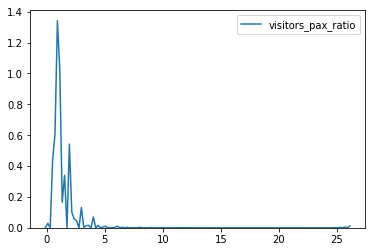

In [126]:
sns.kdeplot(train['visitors_pax_ratio'])

### What is the average number of visitors a memberm travels with?

In [127]:
member_visitors_size=train.groupby(['memberid'])['total_visitors'].agg(['max', 'mean','min','median']).reset_index()
member_visitors_size=member_visitors_size.rename(columns={'max':'max_total_visitors','median':'median_total_visitors','min':'min_total_visitors','mean':'mean_total_visitors'})

In [128]:
member_visitors_size

,memberid,max_total_visitors,mean_total_visitors,min_total_visitors,median_total_visitors
0,00005d44634de09d36aaa5ccb20b67223ec9406c532335...,4,2.500000,2,2.0
1,0000a957d528a2df1dc9ed2314bc009e8666e75a2d6c23...,9,5.500000,2,5.5
2,00016b96386f53adf2ea4beee032a8793e66e6ddd0ed28...,3,2.500000,2,2.5
3,00021328914515303c6992143d1f0bedaf1564dc607b72...,4,4.000000,4,4.0
4,000218e18abc5d2e73212e064983cd4433f7969fd908a6...,12,4.500000,2,2.0
5,0002f0156e1f9944885df03fbdf079c662a1755ef4c6df...,3,3.000000,3,3.0
6,00039767c3d802b128ce0c2c4b221bd4bc05ed226e0924...,2,2.000000,2,2.0
7,0003dbd80ea9a5fb7a2efabdb984c5fa75450cda717e39...,4,3.000000,2,3.0
8,00041e4ce46ac3e499071b24572e21d3493d6c23ee0360...,3,2.500000,2,2.5
9,00047791e3626d66f5d8b93064b25c164b679b6d49d8a2...,4,3.500000,3,3.5


In [129]:
train=pd.merge(train,member_visitors_size,on='memberid',how='left')

In [130]:
train.shape

(341424, 52)

In [131]:
member_visitors_size=test.groupby(['memberid'])['total_visitors'].agg(['max', 'mean','min','median']).reset_index()
member_visitors_size=member_visitors_size.rename(columns={'max':'max_total_visitors','median':'median_total_visitors','min':'min_total_visitors','mean':'mean_total_visitors'})

In [132]:
test=pd.merge(test,member_visitors_size,on='memberid',how='left')

In [133]:
test.shape

(146765, 52)

### Is the resort state same as the member state

In [134]:
train['is_resort_state_same_member_state']=train.apply(lambda row:1 if row['state_code_resort']==row['state_code_residence'] else 0,axis=1)

In [135]:
test['is_resort_state_same_member_state']=test.apply(lambda row:1 if row['state_code_resort']==row['state_code_residence'] else 0,axis=1)

### On a particular checkin date, how many reservations a resort has?

In [136]:
data=pd.concat([train,test],sort=False)
data.shape

(488189, 53)

In [137]:
data.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,booking_date_year,booking_date_day,booking_date_month,booking_date_dayofweek,booking_date_isweekend,checkin_date_year,checkin_date_day,checkin_date_month,checkin_date_dayofweek,checkin_date_isweekend,checkout_date_year,checkout_date_day,checkout_date_month,checkout_date_dayofweek,checkout_date_isweekend,dataset,season_holidayed_code_new,diff_booking_checkin_days,days_of_stay,first_booking_date,is_first_booking,num_reservations_same_day,total_visitors,visitors_pax_ratio,max_total_visitors,mean_total_visitors,min_total_visitors,median_total_visitors,is_resort_state_same_member_state
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428,2018,5,4,3,0,2018,5,4,3,0,2018,6,4,4,0,train,2.0,0,1,2015-01-23,0,1,2,0.666667,4,2.285714,2,2.0,0
1,03930f033646d073462b35d411616323597715ac4fc398...,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563,2015,23,1,4,0,2015,11,4,5,1,2015,16,4,3,0,train,2.0,78,5,2015-01-23,1,1,2,1.000000,4,2.285714,2,2.0,0
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602,2015,28,1,2,0,2015,1,2,6,1,2015,5,2,3,0,train,2.0,4,4,2015-01-23,0,1,2,1.000000,4,2.285714,2,2.0,0
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943,2015,2,5,5,1,2015,11,6,3,0,2015,16,6,1,0,train,2.0,40,5,2015-01-23,0,1,4,2.000000,4,2.285714,2,2.0,0
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346,2015,2,9,2,0,2015,14,12,0,0,2015,19,12,5,1,train,2.0,103,5,2015-01-23,0,1,2,1.000000,4,2.285714,2,2.0,0


In [138]:
num_reservations=data.groupby(['checkin_date'])['reservation_id'].count().reset_index().rename(columns={'reservation_id':'num_reservations_resort_on_that_day'})

In [139]:
num_reservations.shape

(1534, 2)

In [140]:
train=pd.merge(train,num_reservations,on='checkin_date',how='left')


In [141]:
test=pd.merge(test,num_reservations,on='checkin_date',how='left')

In [142]:
train.shape

(341424, 54)

In [143]:
test.shape

(146765, 54)

### How many different resorts a member has booked??

In [144]:
num_resorts_booked=data.groupby(['memberid'])['resort_id'].nunique().reset_index().rename(columns={'resort_id':'num_unique_resorts_booked_by_member'})

In [145]:
train=pd.merge(train,num_resorts_booked,on='memberid',how='left')
test=pd.merge(test,num_resorts_booked,on='memberid',how='left')

In [146]:
train.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'booking_date_year',
       'booking_date_day', 'booking_date_month', 'booking_date_dayofweek',
       'booking_date_isweekend', 'checkin_date_year', 'checkin_date_day',
       'checkin_date_month', 'checkin_date_dayofweek',
       'checkin_date_isweekend', 'checkout_date_year', 'checkout_date_day',
       'checkout_date_month', 'checkout_date_dayofweek',
       'checkout_date_isweekend', 'dataset', 'season_holidayed_code_new',
       'diff_booking_checkin_days'

In [149]:
train['reservationstatusid_code'].value_counts()

A    312481
B     14811
C     14131
D         1
Name: reservationstatusid_code, dtype: int64

In [150]:
test['reservationstatusid_code'].value_counts()

A    134262
B      6429
C      6074
Name: reservationstatusid_code, dtype: int64

## We can drop row with reservationstatusid_code= D from the datset

In [152]:
train=train[train['reservationstatusid_code']!='D']
train.shape

(341423, 55)

### Number of resorts in the region?

In [153]:
data=pd.concat([train,test])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [154]:
data.shape

(488188, 55)

In [167]:
num_resorts_region=data.groupby(['resort_region_code'])['resort_id'].nunique().reset_index().rename(columns={'resort_id':
                                                                                                           'num_resorts_region'})


In [168]:
train=pd.merge(train,num_resorts_region,on='resort_region_code',how='left')

In [169]:
train.shape

(341423, 56)

In [170]:
test=pd.merge(test,num_resorts_region,on='resort_region_code',how='left')

### Number of resorts booked on a particular checkin date?

In [180]:
num_resorts_booked=data.groupby(['resort_region_code','checkin_date'])['resort_id'].nunique().reset_index().rename(columns={'resort_id':
                                                                                                                          'num_resorts_booked'})

In [181]:
train=pd.merge(train,num_resorts_booked,on=['resort_region_code','checkin_date'],how='left')

In [182]:
train.shape

(341423, 57)

In [183]:
test=pd.merge(test,num_resorts_booked,on=['resort_region_code','checkin_date'],how='left')

In [184]:
test.shape

(146765, 57)

In [185]:
train.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,booking_date_year,booking_date_day,booking_date_month,booking_date_dayofweek,booking_date_isweekend,checkin_date_year,checkin_date_day,checkin_date_month,checkin_date_dayofweek,checkin_date_isweekend,checkout_date_year,checkout_date_day,checkout_date_month,checkout_date_dayofweek,checkout_date_isweekend,dataset,season_holidayed_code_new,diff_booking_checkin_days,days_of_stay,first_booking_date,is_first_booking,num_reservations_same_day,total_visitors,visitors_pax_ratio,max_total_visitors,mean_total_visitors,min_total_visitors,median_total_visitors,is_resort_state_same_member_state,num_reservations_resort_on_that_day,num_unique_resorts_booked_by_member,num_resorts_region,num_resorts_booked
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428,2018,5,4,3,0,2018,5,4,3,0,2018,6,4,4,0,train,2.0,0,1,2015-01-23,0,1,2,0.666667,4,2.285714,2,2.0,0,330,10,10,10
1,03930f033646d073462b35d411616323597715ac4fc398...,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563,2015,23,1,4,0,2015,11,4,5,1,2015,16,4,3,0,train,2.0,78,5,2015-01-23,1,1,2,1.000000,4,2.285714,2,2.0,0,394,10,10,8
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602,2015,28,1,2,0,2015,1,2,6,1,2015,5,2,3,0,train,2.0,4,4,2015-01-23,0,1,2,1.000000,4,2.285714,2,2.0,0,272,10,12,9
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943,2015,2,5,5,1,2015,11,6,3,0,2015,16,6,1,0,train,2.0,40,5,2015-01-23,0,1,4,2.000000,4,2.285714,2,2.0,0,274,10,10,7
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346,2015,2,9,2,0,2015,14,12,0,0,2015,19,12,5,1,train,2.0,103,5,2015-01-23,0,1,2,1.000000,4,2.285714,2,2.0,0,270,10,10,7


### Percentage of resorts booked in a particular region

In [186]:
train['percentage_resorts_booked_region']=train['num_resorts_booked']/train['num_resorts_region']
test['percentage_resorts_booked_region']=test['num_resorts_booked']/train['num_resorts_region']

In [187]:
train.shape

(341423, 58)

In [188]:
test.shape

(146765, 58)

In [189]:
train['main_product_code'].unique()

array([1, 2, 3, 4, 7])

#### Days of stay vs room nights?

In [203]:
train[train['roomnights']<0]=0
test[test['roomnights']<0]=0

In [204]:
train['day_stay_roomnight_ratio']=train['days_of_stay']/(train['roomnights']+1)
test['day_stay_roomnight_ratio']=test['days_of_stay']/(test['roomnights']+1)

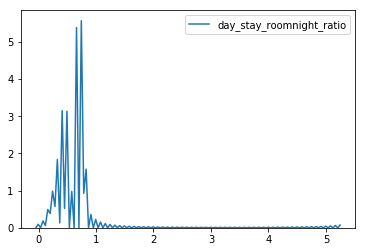

In [205]:
sns.kdeplot(train['day_stay_roomnight_ratio'])

In [206]:
train['day_stay_roomnight_ratio'].describe()

count    341423.000000
mean          0.560780
std           0.193495
min           0.000000
25%           0.400000
50%           0.666667
75%           0.750000
max           5.200000
Name: day_stay_roomnight_ratio, dtype: float64

In [208]:
train['booking_type_code'].value_counts()

1    299014
2     42408
0         1
Name: booking_type_code, dtype: int64

In [209]:
test['booking_type_code'].value_counts()

1    128661
2     18104
Name: booking_type_code, dtype: int64

In [210]:
train=train[train['booking_type_code']!=0]

In [211]:
train.shape

(341422, 59)

Let us build a model on this data and see how it performs on the leaderboard

In [212]:
train.to_csv("Train_Preprocessed_version2.csv",index=False)
test.to_csv("Test_Preprocessed_version2.csv",index=False)

In [215]:
import h2o
from h2o.automl import H2OAutoML

In [214]:
h2o.cluster().shutdown()

AttributeError: 'NoneType' object has no attribute 'shutdown'

In [216]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_201"; Java(TM) SE Runtime Environment (build 1.8.0_201-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from /Users/aiswarya/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/2j/g45ntbfd6m7852zc6ds6gz0c0000gn/T/tmpgve_f9dh
  JVM stdout: /var/folders/2j/g45ntbfd6m7852zc6ds6gz0c0000gn/T/tmpgve_f9dh/h2o_aiswarya_started_from_python.out
  JVM stderr: /var/folders/2j/g45ntbfd6m7852zc6ds6gz0c0000gn/T/tmpgve_f9dh/h2o_aiswarya_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,1 month and 4 days
H2O cluster name:,H2O_from_python_aiswarya_bh1xrd
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [217]:
train=h2o.import_file("Train_Preprocessed_version2.csv")
test=h2o.import_file("Test_Preprocessed_version2.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [218]:
x = train.columns
y = "amount_spent_per_room_night_scaled"
x.remove(y)
x.remove('dataset')
x.remove('reservation_id')
x.remove('memberid')
x.remove('season_holidayed_code')

In [219]:
code_cols = ['channel_code','main_product_code','persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'season_holidayed_code_new', 'state_code_residence', 'state_code_resort',
             'booking_type_code'
            ]

In [220]:
for col in code_cols:
    train[col] = train[col].asfactor()

In [221]:
aml = H2OAutoML(max_models=30, seed=42,max_runtime_secs=7200,project_name="ClubMahindra_Version2",max_runtime_secs_per_model=400)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [223]:
aml.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20190505_193307,0.939049,0.969045,0.939049,0.709057,0.125183
StackedEnsemble_BestOfFamily_AutoML_20190505_193307,0.941281,0.970196,0.941281,0.710419,0.125313
GBM_2_AutoML_20190505_193307,0.944212,0.971706,0.944212,0.711914,0.125477
GBM_3_AutoML_20190505_193307,0.944828,0.972023,0.944828,0.711502,0.1255
GBM_5_AutoML_20190505_193307,0.948405,0.973861,0.948405,0.712901,0.12567
DeepLearning_1_AutoML_20190505_193307,0.951817,0.975611,0.951817,0.713821,0.125935
GBM_4_AutoML_20190505_193307,0.953752,0.976602,0.953752,0.713492,0.125977
GLM_grid_1_AutoML_20190505_193307_model_1,0.961575,0.980599,0.961575,0.719031,nan
DeepLearning_grid_1_AutoML_20190505_193307_model_1,0.98383,0.991882,0.98383,0.718315,0.128117
DeepLearning_grid_1_AutoML_20190505_193307_model_3,0.985167,0.992556,0.985167,0.721471,0.128301


In [224]:
h2o.save_model(aml.leader, path = "Best_AutoModel_v2")

'/Users/aiswarya/DataScienceArena/AV_ClubMahindra/Best_AutoModel_v2/StackedEnsemble_AllModels_AutoML_20190505_193307'

In [225]:
for col in code_cols:
    test[col] = test[col].asfactor()

In [226]:
preds=aml.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [227]:
submission=pd.read_csv("sample_submission.csv")

In [228]:
preds=preds.as_data_frame()

In [229]:
submission['amount_spent_per_room_night_scaled']=preds['predict']

In [230]:
submission.to_csv("Best_AutoML_v2.csv",index=False)